# YTSG Random Forest

This script trains a random forest algorithm against the classified page data

In [7]:
# Import required libraries and set up project

import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.preprocessing import MinMaxScaler
import sqlite3
import matplotlib.pyplot as plt

In [8]:
# Get training data and define feature columns
conn = sqlite3.connect('ytsg-dataset.db')
query = """SELECT 
    * ,
    (LENGTH(categories) - LENGTH(REPLACE(categories, "||", "|")) +1) AS category_count 
FROM manual_page_classifications LIMIT 5000"""
df = pd.read_sql_query(query, conn)

feature_columns = [
    'total_length',
    'file_page',
    'target_words_in_section_titles',
    'category_count',
    'section_count',
    'image_count',
    'audio_count'
]

In [9]:
# Normalize values
# scaler = MinMaxScaler()
# for column in feature_columns:
#     df[column] = scaler.fit_transform(df[[column]])
# print(df[feature_columns].head(5))

In [12]:
# Split out the data and fit a random forest against it

# Split up features (x) and target (y)
x = df[feature_columns]
y = df['rating_class']

# Split up training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=11)

# Train the model
print('Training Model')
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

# Predict test values
print('Predict test set values')
y_pred = rf.predict(x_test)

# Check accuracy
accuracy = accuracy_score(y_test, y_pred)

Training Model
Predict test set values


## Display Results

Accuracy: 0.55


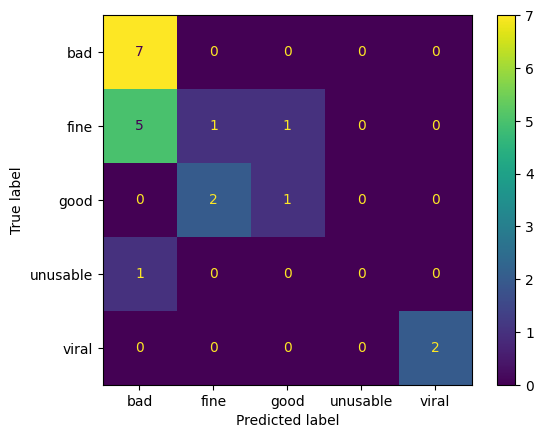

In [13]:
print("Accuracy:", accuracy)
disp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred), display_labels=rf.classes_)
disp.plot()
plt.savefig('confusion_matrix.png')